In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("redwine.csv")
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df["ratings"]=np.where(df["quality"]>6,1,0)
print(df.shape)
df.head()

(1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ratings
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
ratings                 1599 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


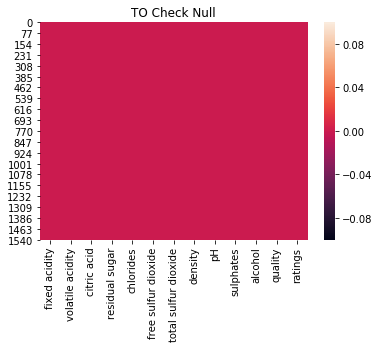

In [5]:
sns.heatmap(df.isnull())
plt.title("TO Check Null")
plt.show()

IT shows no null value

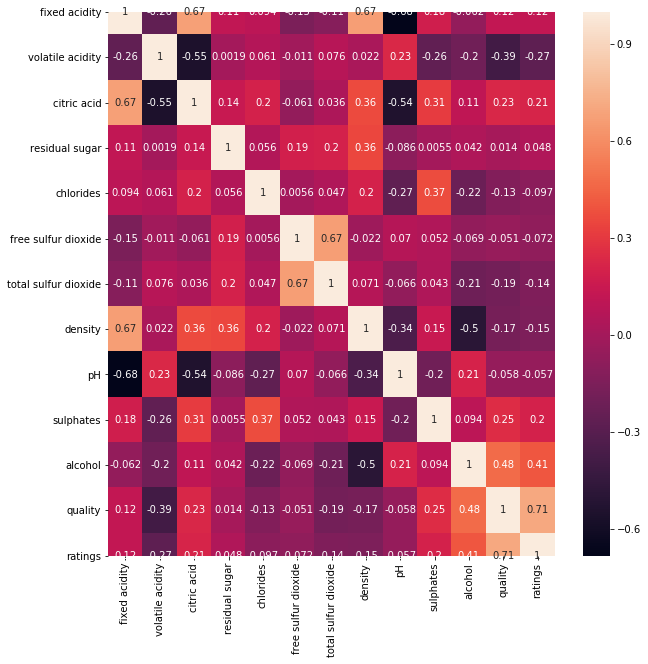

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

alcohol leads to goog quality of wine,
volatile acidity increment leads to bad quality of wine

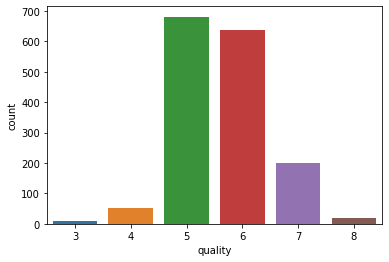

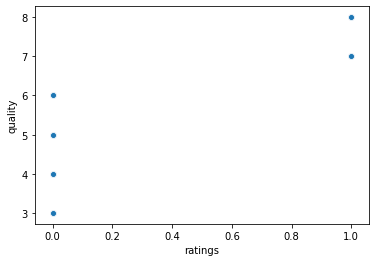

In [7]:
sns.countplot(df["quality"])
plt.show()
sns.scatterplot(df["ratings"],df["quality"],)
plt.show()

quality 5 and 6 are high amount of production

To find outliers present or not

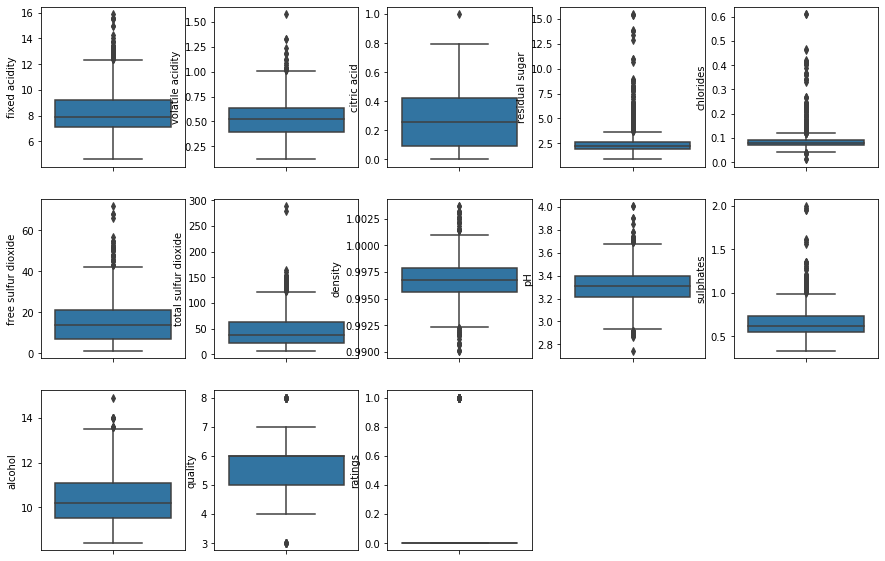

In [8]:
c=df.columns
plt.figure(figsize=(15,10))
for i in range(len(c)):
    plt.subplot(3,5,i+1)
    sns.boxplot(df[c[i]],orient="v")

to remove outliers

In [9]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)
zi=np.where(z>3)
print(zi)

[[0.52835961 0.96187667 1.39147228 ... 0.96024611 0.78782264 0.39625599]
 [0.29854743 1.96744245 1.39147228 ... 0.58477711 0.78782264 0.39625599]
 [0.29854743 1.29706527 1.18607043 ... 0.58477711 0.78782264 0.39625599]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54162988 0.45084835 0.39625599]
 [1.39015528 0.65462046 0.77526673 ... 0.20930812 0.78782264 0.39625599]
 [1.33270223 1.21684919 1.02199944 ... 0.54162988 0.45084835 0.39625599]]
(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  

In [10]:
df1=df[(z<3).all(axis=1)]

In [11]:
#by remome outliers if remove quality 3
print(df1["ratings"].value_counts())
print(df["ratings"].value_counts())
print(df.shape)
print(df1.shape)
lossp=((1599-1451)/1599)*100
print("loss percentage : ",lossp)
#does the removel of target value is right or wrong

0    1250
1     201
Name: ratings, dtype: int64
0    1382
1     217
Name: ratings, dtype: int64
(1599, 13)
(1451, 13)
loss percentage :  9.255784865540964


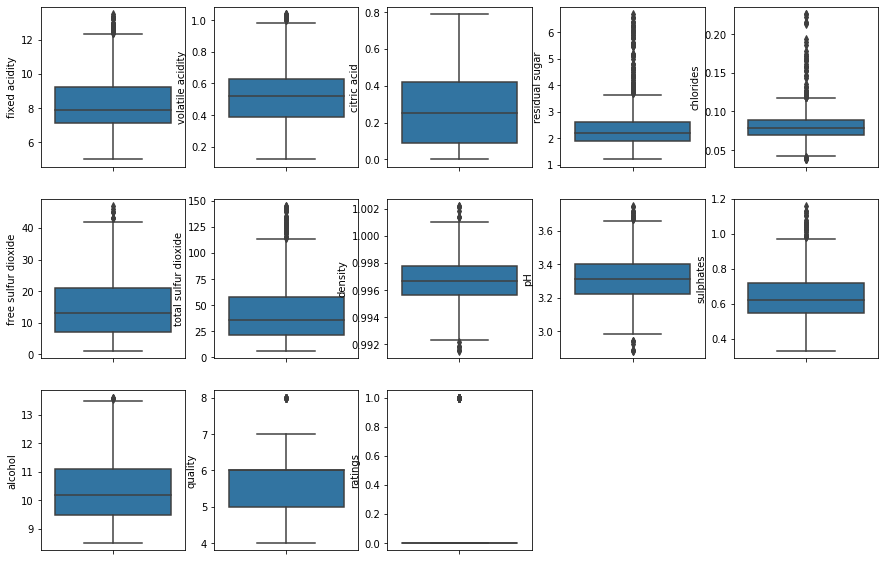

In [12]:
plt.figure(figsize=(15,10))            #still some outliers are showing does it affect model
for i in range(len(c)):
    plt.subplot(3,5,i+1)
    sns.boxplot(df1[c[i]],orient="v")

to find skewed data

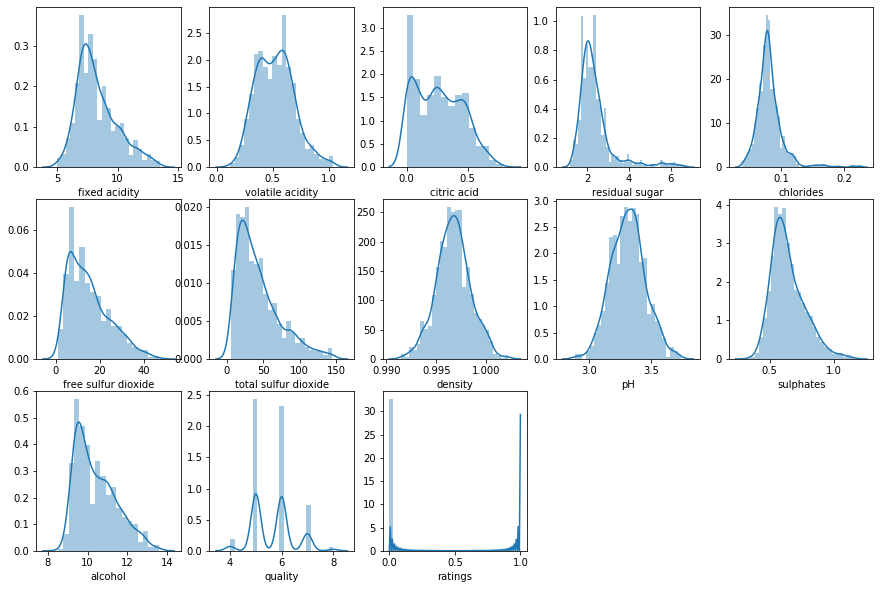

In [13]:
plt.figure(figsize=(15,10))
for i in range(len(c)):
    plt.subplot(3,5,i+1)
    sns.distplot(df1[c[i]])

In [14]:
print(df1.skew())

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
ratings                 2.094941
dtype: float64


to convert skewed data to nearly normal data 

In [15]:
x=df1.iloc[:,0:-2]
y=df1.ratings
print(x.shape)
print(y.shape)

(1451, 11)
(1451,)


In [16]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

to find best random state and model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
macc=0
rand=0
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(xtrain,ytrain)
    pred=LR.predict(xtest)
    acc=accuracy_score(ytest,pred)
    if acc>macc:
        macc=acc
        rand=i
print("best_rand state : ",rand,"max_acc : ",macc)
print("confusion matrix\n",confusion_matrix(ytest,pred))
print("classification_report\n",classification_report(ytest,pred))

best_rand state :  67 max_acc :  0.926605504587156
confusion matrix
 [[364  10]
 [ 42  20]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       374
           1       0.67      0.32      0.43        62

    accuracy                           0.88       436
   macro avg       0.78      0.65      0.68       436
weighted avg       0.86      0.88      0.86       436



In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
print(accuracy_score(ytest,pred))
print("confusion matrix\n",confusion_matrix(ytest,pred))
print("classification_report\n",classification_report(ytest,pred))

0.8715596330275229
confusion matrix
 [[343  31]
 [ 25  37]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       374
           1       0.54      0.60      0.57        62

    accuracy                           0.87       436
   macro avg       0.74      0.76      0.75       436
weighted avg       0.88      0.87      0.87       436



In [20]:
from sklearn.svm import SVC 
sv=SVC()
sv.fit(xtrain,ytrain)
pred=sv.predict(xtest)
print("acc : ",accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

acc :  0.8899082568807339
[[368   6]
 [ 42  20]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       374
           1       0.77      0.32      0.45        62

    accuracy                           0.89       436
   macro avg       0.83      0.65      0.70       436
weighted avg       0.88      0.89      0.87       436



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
print("acc : ",accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

acc :  0.8876146788990825
[[358  16]
 [ 33  29]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       374
           1       0.64      0.47      0.54        62

    accuracy                           0.89       436
   macro avg       0.78      0.71      0.74       436
weighted avg       0.88      0.89      0.88       436



In [22]:
#from sklearn.naive_bayes import MultinomialNB
#mnb=MultinomialNB()
#mnb.fit(xtrain,ytrain)
#pred=mnb.predict(xtest)
#print("acc : ",accuracy_score(ytest,pred))
#print(confusion_matrix(ytest,pred))
#print(classification_report(ytest,pred))# it showing X should non negative

to find best model

In [23]:
from sklearn.model_selection import cross_val_score
m=[dtc,sv,knn,LR]
for i in m:
    cvp=cross_val_score(i,x,y,cv=4).mean()
    print("best model",i,cvp)

best model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 0.8138758738331817
best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 0.8711126998733728
best model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 0.8607516604440261
best model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_inte

hyper parameter tuneing to get high accuracy

In [24]:
from sklearn.model_selection import GridSearchCV
para={"n_neighbors":np.arange(2,10)}
gv=GridSearchCV(knn,para,cv=5)
gv.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
gv.best_params_

{'n_neighbors': 2}

In [26]:
gvpred=gv.predict(xtest)
accuracy_score(ytest,gvpred)

0.8807339449541285

accuracy is increased by 1%

from above cross val score KNeighborsClassifier seams to be a better model

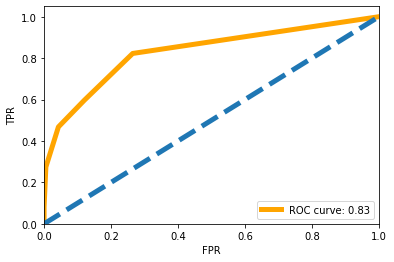

In [27]:
from sklearn.metrics import roc_curve, auc
pre=knn.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,pre)#fpr,tpr,thresholds=roc_curve(pre,ytest) it shows continuous formet not support
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color="orange",lw=5,label="ROC curve: %.2f"%roc_auc)
plt.plot([0,1],[0,1],lw=5,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [28]:
import joblib
joblib.dump(knn,"redwine.obj")

['redwine.obj']

In [29]:
v=joblib.load("redwine.obj")

In [30]:
l=np.array([7.8,.76,.04,2.3,.092,15,54,.9,3.2,.65,9.8])
l=l.reshape(1,-1)
l.shape

(1, 11)

In [31]:
v.predict(l)

array([0])

if 0 its a bad quality // if 1 it refers good quality